<a href="https://colab.research.google.com/github/LeTuanCS150901/AI_Introductory/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
pwd

'/content'

In [ ]:
cd /content/drive/MyDrive/Test

/content/drive/MyDrive/Test


In [ ]:
pwd

'/content/drive/MyDrive/Test'

In [ ]:
ls

Hand_written_digits_recognition/  Test


# I. Import data set and libraries needed


In [ ]:
from keras.datasets import mnist
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X.shape

(60000, 28, 28)

Visualize some images in the training data


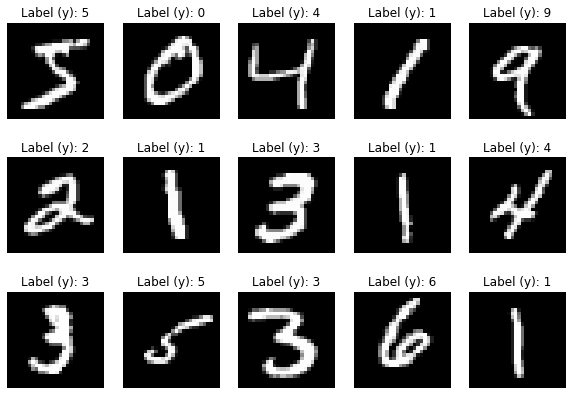

In [ ]:
# Plotting
fig = plt.figure(figsize=(10,7))
for i in range(15):  
    ax = fig.add_subplot(3, 5, i+1)
    ax.imshow(train_X[i], cmap=plt.get_cmap('gray'))
    ax.set_title('Label (y): {y}'.format(y=train_y[i]))
    plt.axis('off')

In [ ]:
# save the model to disk
import os 
import pickle # save train model
def save_model(obj, filename):
    filename = os.path.join(os.path.abspath('./'), filename + ".sav")
    pickle_file = open(filename, 'wb')
    pickle.dump(obj, pickle_file)
    pickle_file.close()

def load_model(filename):
    file_path = os.path.join(os.path.abspath('./'), filename)
    loaded_model = pickle.load(open(file_path, 'rb'))
    return loaded_model


In [ ]:
# load_model('train_full.sav')

Visualizing the dimensions of each images and convert them from 3D to 2D.

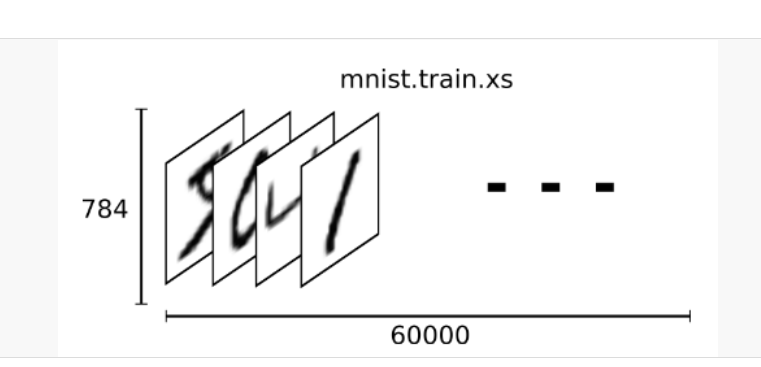

In [ ]:
X_train = train_X.reshape(60000, 28*28)
X_test = test_X.reshape(10000, 28*28)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


Labeled data

In [ ]:
train_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

We make the tag data “one-hot vectors.” A one-hot vector is 0 except for one digit.


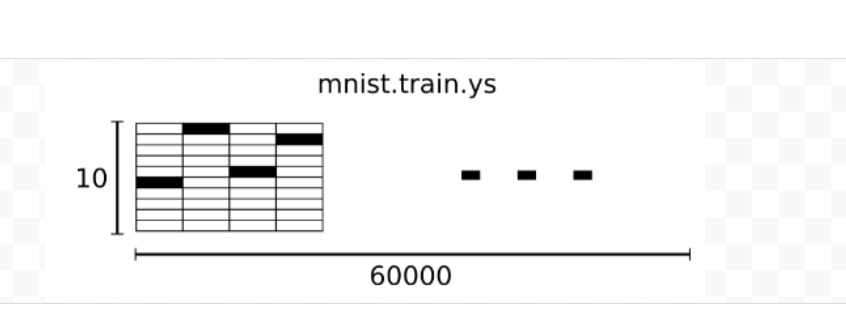

In [ ]:
def one_hot_encoding(y, c):
  """
  y: labels of training set
  c: the number of classes (from 0 to 9)
  """
  m = len(y) # number of training examples
  
  y_hot = np.zeros((m, c))  # A zero matrix of size (num_examples, classes)
    
  # Putting 1 for column where the label is
  y_hot[np.arange(len(y)), y] = 1
    
  return y_hot

# II. Learning algorithm 

## Part 1: The gradient of the loss function

Compute the gradient of a single example given parameters W.

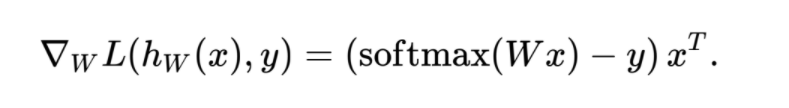

In [ ]:
def multinomial_logreg_grad_i(X, W, y_hot):
     """
     X: matrix input
     W: the weight parameters of this model    
     y_hot: one-hot vector encoding correct class 

    """
     z = X @ W  # hypothesis function using Linear transformation with W and X.
     y_predict = softmax(z)
 
     weight_gradient = X.T @ (y_predict - y_hot)

     return weight_gradient 

We want to perform empirical risk minimization using the **cross entropy** loss function. Firstly, we compute the loss of a single example given parameters W

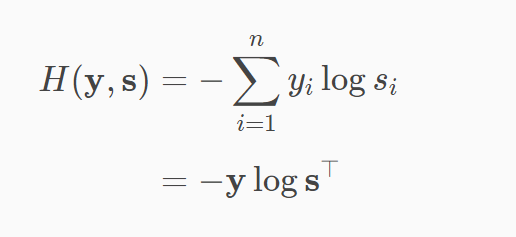

In [ ]:
def multinomial_logreg_loss_i(X, W, y_hot):
    """
    Return the cross-entropy of vectors y labels and softmax.
    param y_hot: one-hot vector encoding correct class 
    returns: vecto cost

    """
    z = X @ W # hypothesis function 
    y_predict = softmax(z) 
    
    return -np.log( y_predict[ np.where(y_hot) ] )

We know that every picture of MNIST represents a number from 0 to 9. We want to **get the probability that a given picture represents each number by using softmax function**

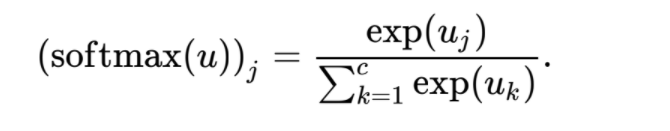

In [ ]:
def softmax(z):
  """
  z: hypothesis function using Linear transformation with W and X.
  """
  exp = np.exp(z - np.max(z)) # Subtracting the max of z for numerical stability.

  for i in range(len(z)):   
      exp[i] /= np.sum(exp[i])
        
  return exp

## Part 2: Gradient descent

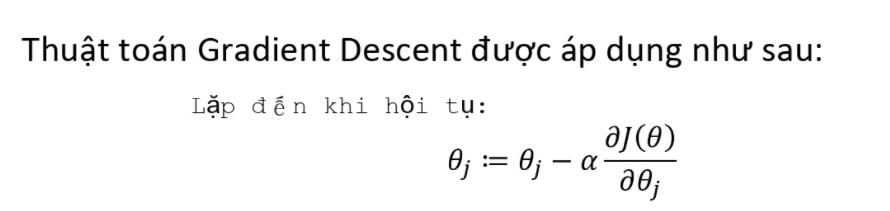

In [ ]:
def multinomial_logreg_total_grad(X, W, y_hot, learning_rate, lam_da, iterations):

    J_history = []
    
    for i in range(iterations):
      total_loss = 1/m * sum( multinomial_logreg_loss_i(X, W, y_hot) )
     

      grad =  multinomial_logreg_grad_i(X, W, y_hot)
      #print("gradient ", i, grad )

      W = W - 1/m * learning_rate * (grad + (lam_da/2 * np.linalg.norm(W)) )
      #print("Weight ", i, W)

      if i % 10 == 9:
        print("total loss ", i + 1 , total_loss)
        J_history.append(total_loss)

    return (W, J_history)

In [ ]:
W_optimal, J_test_history = multinomial_logreg_total_grad(X_test, W, y_hot_test, learning_rate, lam_da, iterations)

total loss  10 1.1607001124140937
total loss  20 0.5755682465962676
total loss  30 0.4202876498277316
total loss  40 0.3628991321591592
total loss  50 0.34456142691091735
total loss  60 0.3312780936857693
total loss  70 0.32066092487495196
total loss  80 0.31186239179034336
total loss  90 0.3043839851666763
total loss  100 0.29790392088241546
total loss  110 0.2922027432974582
total loss  120 0.2871244345377745
total loss  130 0.2825543632723131
total loss  140 0.2784060088915559
total loss  150 0.2746125823157997
total loss  160 0.27112153032394587
total loss  170 0.2678908139006283
total loss  180 0.26488631845535626
total loss  190 0.2620800088185328
total loss  200 0.2594485874859676
total loss  210 0.25697250088137424
total loss  220 0.2546351912666075
total loss  230 0.25242252524116365
total loss  240 0.2503223512959557
total loss  250 0.24832415310412823
total loss  260 0.24641877481115085
total loss  270 0.24459820115687173
total loss  280 0.24285537984204858
total loss  290 0

In [ ]:
save_model(W_optimal, "train_full_W_optimal")


## Part 3: Computing more efficiently

In [ ]:
train_y = np.array(train_y)
train_y = train_y[:, np.newaxis] # chuyển vị vecto y thành m rows và 1 column
train_y.shape

In [ ]:
def multinomial_logreg_total_grad(X, y_hot):

  theta = np.linalg.pinv( X.T.dot(X) ).dot(X.T.dot(y_hot))

  total_loss = 1/m * sum(theta)

#   return (theta, total_loss)

In [ ]:
theta, total_loss_normal_equation = multinomial_logreg_total_grad(X, y_hot)
theta

In [ ]:
def multinomial_logreg_total_loss(X , theta, y_hot):

    temp = multinomial_logreg_loss_i(X, theta, y_hot)

    return sum(temp) / m

In [ ]:
multinomial_logreg_total_loss(X , theta, y_hot)

## Part 4: Evaluating gradient descent

Plot the **resulting lost for our training lost**

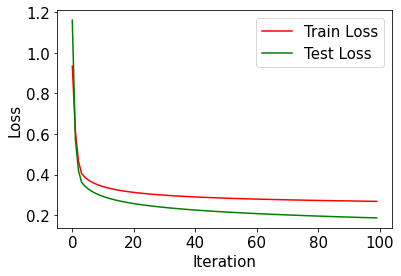

In [ ]:
x_range = [i for i in range(100)]


plt.plot(x_range, J_history, color='red', label= 'Train Loss')
#plt.scatter(x= x_range, y=J_history, color='red', label= 'Thực tế')
plt.plot(x_range, J_test_history,color='green',label= "Test Loss")
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.rcParams['font.size'] = 15.0
plt.legend()
plt.show()


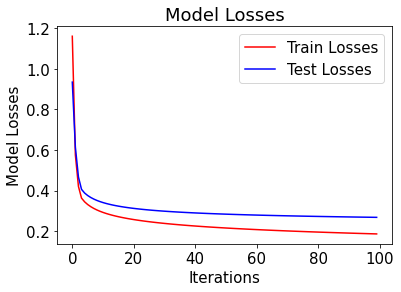

<Figure size 432x288 with 0 Axes>

In [ ]:
x_range = [i for i in range(100)]
plt.title('Model Losses')
plt.plot(x_range, J_test_history, color='red', label= 'Train Losses')
plt.plot(x_range, J_history, color='blue',label= "Test Losses")
plt.xlabel('Iterations')
plt.ylabel('Model Losses')
plt.rcParams['font.size'] = 15.0
plt.legend()
plt.show()
plt.savefig("ModelLosses.png")

In [ ]:
save_model(J_history, "J_history")

In [ ]:
load_model('J_history.sav')

# III. Training Model

Normalize our data by dividing to 255 

In [ ]:
X_train = X_train / 255
X_train.shape
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


We join **matrix training data** with **matrix Weights **into one **huge MATRIX**. Afterward, initializing the **weight W randomly** and set **b to a vector of zeros**

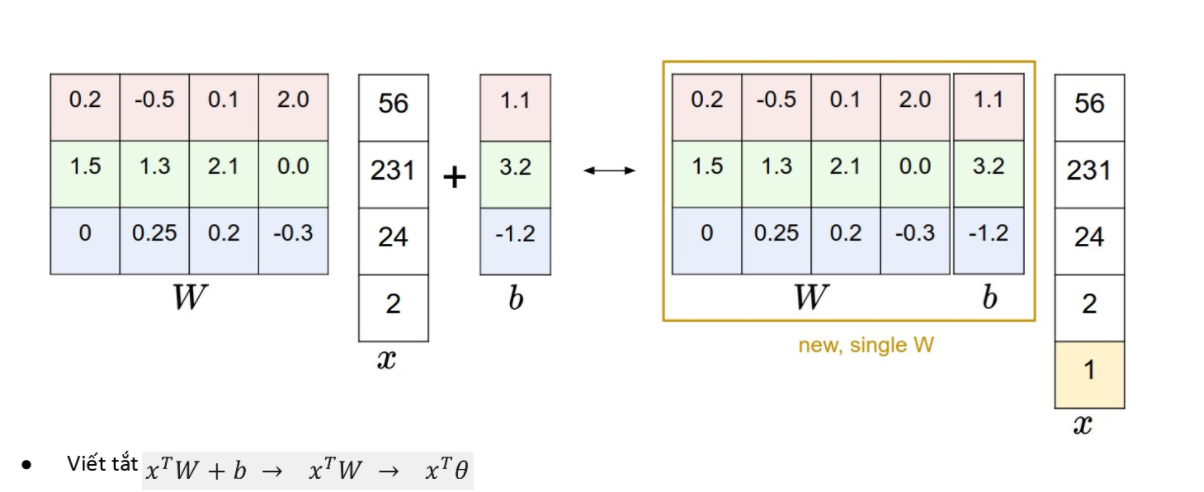

In [ ]:
m = len(train_y) # number of training examples
print("m", m)
print("X ban dau", X_train.shape)

X = np.hstack( (np.ones((m,1)), X_train) ) # concatenate biasses vecto with X input matrix 
print("X sau khi noi vecto", X.shape)

n = np.size(X, 1) # get size of X matrix columns
print("n", n)
W = np.zeros((n, 10)) # Initializing randowm Weights
print("theta", W.shape)

m 60000
X ban dau (60000, 784)
X sau khi noi vecto (60000, 785)
n 785
theta (785, 10)


Initializing parameters for calculating 

In [ ]:
c = 10 # the number of classes from 0 to 9
iterations = 1000 # the number of loops
learning_rate = 1.0
lam_da = 0.0001

In [ ]:
y_hot = one_hot_encoding(train_y, c)
y_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

We convert labeled data to **"one-hot vector"**

In [ ]:
y_hot.shape

(60000, 10)

In [ ]:
print(X.shape)
print(W.shape)
print(y_hot.shape)

(60000, 785)
(785, 10)
(60000, 10)


We test our random Weights and return a vector rcontains errors of each example (x, y)

In [ ]:
initial_cost = multinomial_logreg_loss_i(X, W, y_hot)
initial_cost

array([2.30258509, 2.30258509, 2.30258509, ..., 2.30258509, 2.30258509,
       2.30258509])

Subsequenly, training our model and return **optimal Weight matrix** as well as the **cost history** for **1000 iterations**  

In [ ]:
save_model(J_history, "train_full")


# IV. Testing

In [ ]:
def make_predictions(X, W):
  """
  X: matrix input
  W: the weight parameters of this model
  """
  # hypothesis function using Linear transformation with W and X.
  z = X @ W
  y_predict = softmax(z)
    
  # Returning the class with highest probability.
  return np.argmax(y_predict, axis=1)

Normalize our test data by dividing to 255 

In [ ]:
X_test = test_X.reshape(10000, 28*28)
X_test = X_test/255

m = X_test.shape[0]
X_test = np.hstack( (np.ones((m, 1)), X_test) )
X_test.shape

(10000, 785)

Make predictions about the test data using the optimized Weight values

In [ ]:
test_prediction = make_predictions(X_test, W_optimal)
print(test_prediction)
print(test_y)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [ ]:
theta

In [ ]:
def measure_accuracy(y, y_predict):
  return np.sum(y == y_predict)/ len(y)

In [ ]:
measure_accuracy(test_y, test_prediction)


0.9477

# V. Predicting


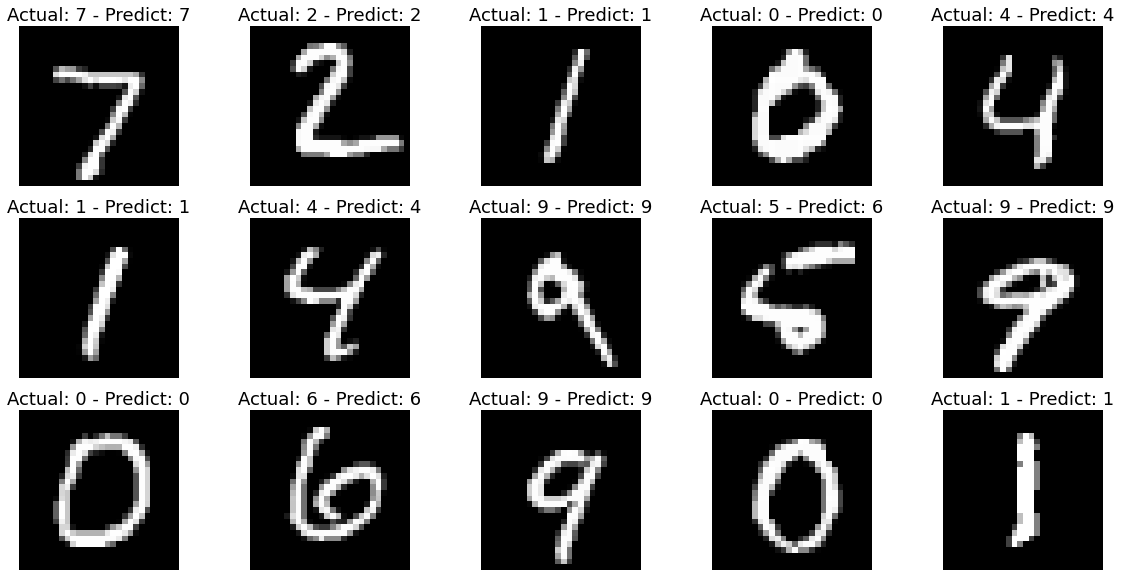

In [143]:
fig = plt.figure(figsize=(20, 10))

for i in range(15):  
    ax = fig.add_subplot(3, 5, i+1)
    ax.imshow(test_X[i], cmap=plt.get_cmap('gray'))
    
    ax.set_title('Actual: {actual} - Predict: {predict}'.format(actual= test_y[i], predict = test_prediction[i]))
    plt.axis('off')


# New Section